# Notebook for looking at median over time 

In [4]:
# potential use of rolling median
# vs. using first block and updating occasionally 

In [1]:
import numpy as np
import time
import tifffile
import scipy.signal
import matplotlib.pyplot as plt
from tqdm import tqdm
import h5py

In [4]:
# open the file as a memmap 
file_path = "/home/clewis/repos/holo-nbs/rb26_20240111/raw_voltage_chunk.tif"
data = tifffile.memmap(file_path)
data.shape

(384, 3000001)

## Filter chunks of data, calculate median

In [5]:
# define filter functions
def butter(cutoff, fs, order=5, btype='high'):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype=btype, analog=False)
    return b, a


def butter_filter(data, cutoff, fs, order=5, axis=-1, btype='high'):
    b, a = butter(cutoff, fs, order=order, btype=btype)
    y = scipy.signal.filtfilt(b, a, data, axis=axis)
    return y

# 10 ms chunks

In [85]:
median = list()
# try processing the first 100 5ms chunks of data
j = 3_00
for i in tqdm(range(5_000)):
    l_time = int(i * j)
    r_time = int((i*j) + j)
    d = data[:, l_time:r_time]
    f = butter_filter(d, 1000, 30_000)
    median.append(np.median(f))

100%|████████████████████████| 5000/5000 [00:11<00:00, 451.38it/s]


Text(0.5, 1.0, '10ms Chunks, 50s Data')

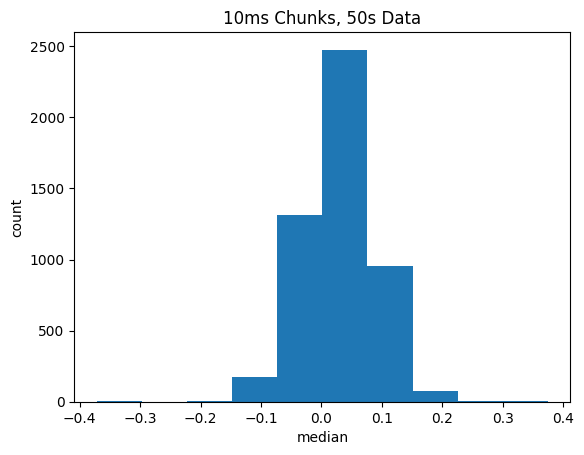

In [86]:
plt.hist(median)
plt.xlabel("median")
plt.ylabel("count")
plt.title("10ms Chunks, 50s Data")

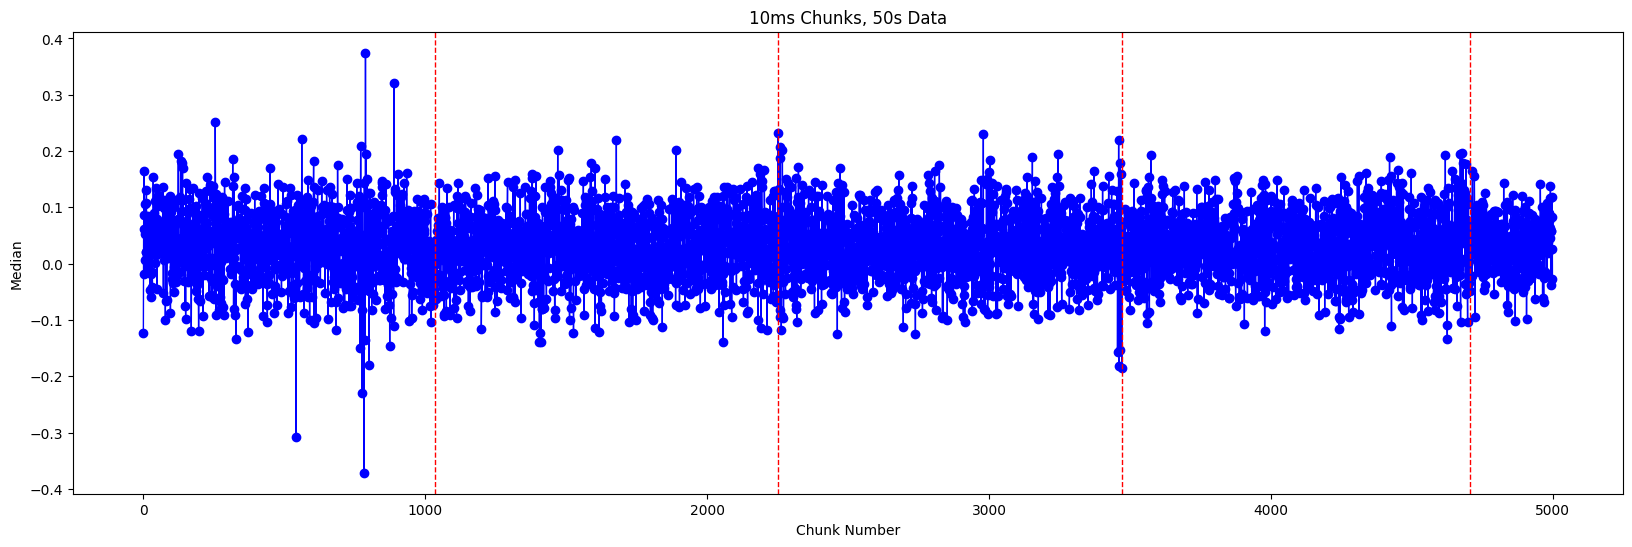

In [88]:
plt.figure(figsize=(20, 6))
plt.plot(range(len(median[:])), median[:], color='blue', linestyle='-', marker='o', linewidth=1)
plt.xlabel("Chunk Number")
plt.ylabel("Median")
plt.title("10ms Chunks, 50s Data")

a = [1034, 2254, 3474, 4708,]
for i in a:
    plt.axvline(x=i-1, color='r', linestyle='--', linewidth=1)

# 5 ms

In [ ]:
median = list()
# try processing the first 100 5ms chunks of data
j = 1_50
for i in tqdm(range(10_000)):
    l_time = int(i * j)
    r_time = int((i*j) + j)
    d = data[:, l_time:r_time]
    f = butter_filter(d, 1000, 30_000)
    median.append(np.median(f))

Text(0.5, 1.0, '5ms Chunks, 50s Data')

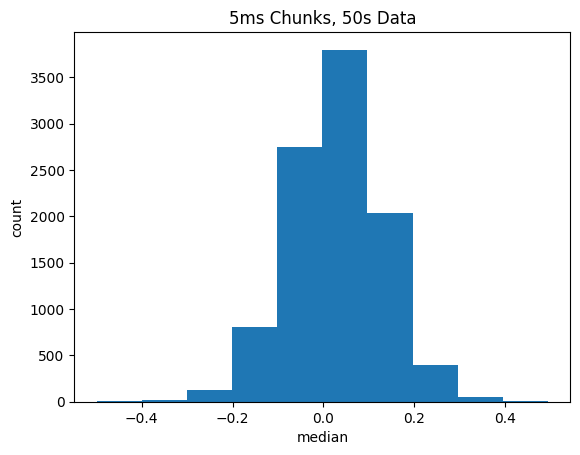

In [67]:
plt.hist(median)
plt.xlabel("median")
plt.ylabel("count")
plt.title("5ms Chunks, 50s Data")

Text(0.5, 1.0, '5ms Chunks, 50s Data')

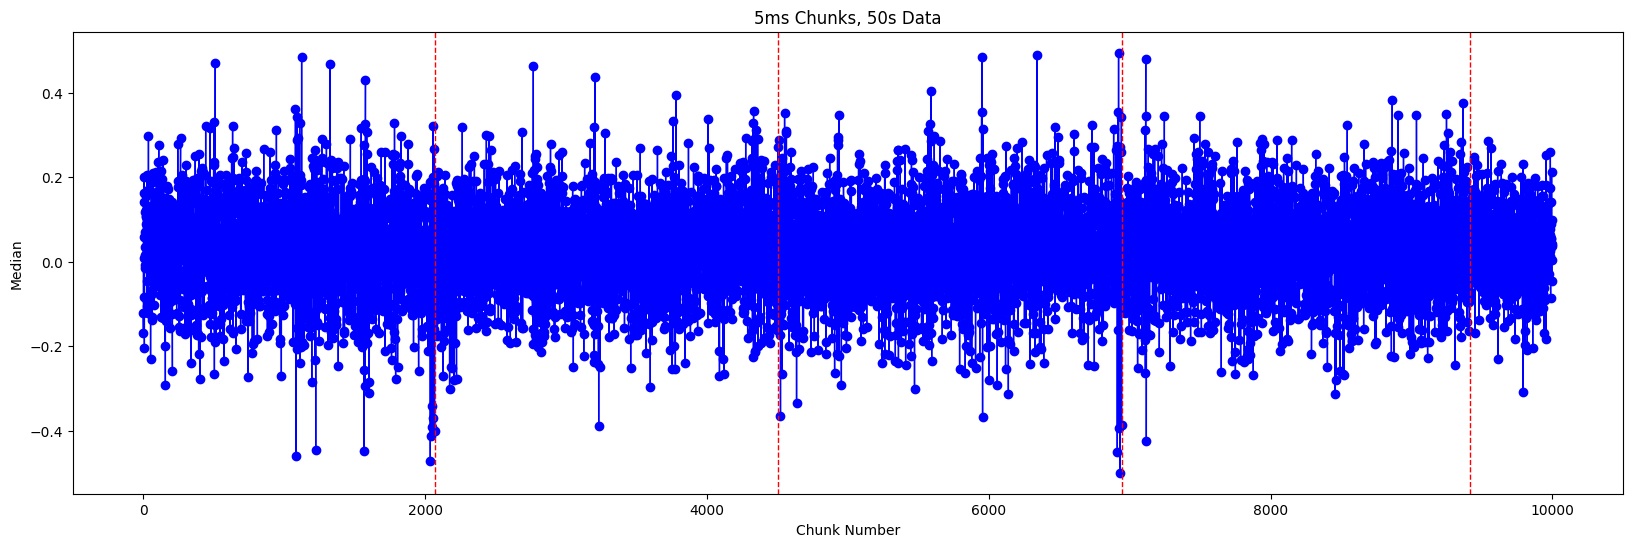

In [83]:
plt.figure(figsize=(20, 6))
plt.plot(range(len(median[:])), median[:], color='blue', linestyle='-', marker='o', linewidth=1)
plt.xlabel("Chunk Number")
plt.ylabel("Median")
a = [2069, 4508, 6949, 9416]
for i in a:
    plt.axvline(x=i-1, color='r', linestyle='--', linewidth=1)
plt.title("5ms Chunks, 50s Data")

In [76]:
l_time

1499850

In [77]:
r_time

1500000

In [89]:
f = h5py.File("/home/clewis/repos/holo-nbs/data/rb26_20240111_datastruct_pt2.mat", "r")
a = f['data']['laser_rec_time'][:] / 1000

ixs = np.where((a >= 5000) & (a <= 5100))[0]
laser_times = a[ixs]

stim_times = (laser_times - 5000) * 30_000

[a/300 for a in list(stim_times[:, 0])]

[np.float64(1034.8587477284127),
 np.float64(2254.3119114488945),
 np.float64(3474.5332892780425),
 np.float64(4708.293408227291),
 np.float64(5927.8043945150785),
 np.float64(7160.416322484707),
 np.float64(8384.586155625311),
 np.float64(9618.676689244967)]